In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import molsysmt as msm
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Unwrap

In [3]:
molsys = msm.convert(msm.demo['two LJ particles']['traj.trjpk'],
                     to_form='molsysmt.TrajectoryDict')

/home/diego/MyMachine/locals/miniconda3/envs/MolSysMT@dprada_3.9/lib/python3.9/site-packages/numpy/ma/core.py:2826: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


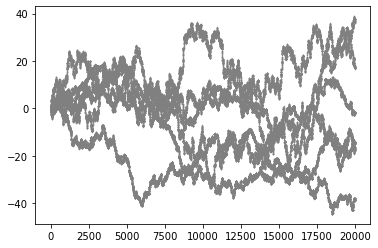

In [4]:
for particle, coordinate in itertools.product(range(2), range(3)):
    plt.scatter(molsys['time'], molsys['coordinates'][:, particle, coordinate], s=1, color='grey', marker='.')
plt.show()

In [5]:
box_shape, box_lengths = msm.get(molsys, element='system', box_shape=True, box_lengths=True)

In [6]:
box_shape

'cubic'

In [7]:
box_lengths[0]

Magnitude,[3.0 3.0 3.0]
Units,nanometer


In [8]:
molsys_wrapped = msm.pbc.wrap_to_pbc(molsys)

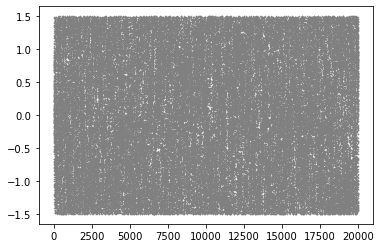

In [9]:
for particle, coordinate in itertools.product(range(2), range(3)):
    plt.scatter(molsys_wrapped['time'], molsys_wrapped['coordinates'][:, particle, coordinate], s=1, color='grey', marker='.')
plt.show()

In [10]:
molsys_unwrapped = msm.pbc.unwrap(molsys_wrapped)

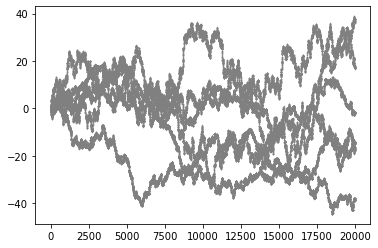

In [11]:
for particle, coordinate in itertools.product(range(2), range(3)):
    plt.scatter(molsys_unwrapped['time'], molsys_unwrapped['coordinates'][:, particle, coordinate], s=1, color='grey', marker='.')
plt.show()

In [12]:
np.allclose(molsys_unwrapped['coordinates'][:,:,:], molsys['coordinates'][:,:,:])

True